<a href="https://colab.research.google.com/github/shaghxyegh/Data-mining/blob/main/DataMiningP3_4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re


# **Merge DataSets**

In [2]:

dfGP = pd.read_csv('GooglePlay.csv')
dfPS = pd.read_csv('Playstore_final.csv')


merged_df = pd.merge(dfPS, dfGP, left_on=['App Name'], right_on=['App'], how='inner', suffixes=('_PS', '_GP'))
merged_df = merged_df.loc[:, ~merged_df.columns.str.startswith('Unnamed')]

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_dataset.csv', index=False)


<ipython-input-2-8a952eb773b2>:2: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  dfPS = pd.read_csv('Playstore_final.csv')


In [3]:
print(len(merged_df))

6250


In [4]:

def normalize_category(category):
    category = re.sub(r'[^\w\s]', '', category.lower())

    # Convert the category to lowercase and replace special characters
    normalized = category.title().replace('And','&' ).replace('_',' ' )
    return normalized


In [5]:
merged_df['Category_GP'] = merged_df['Category_GP'].apply(normalize_category)

In this cell we check catogory saved in Google Play and Play Store datasets and we have found that there are some values which have conflict in this field and we correct them by comparing catogories with the genres.

In [6]:
c = 0
e = 0
for index, row in merged_df.iterrows():

    if merged_df.loc[index, 'Category_GP'] != merged_df.loc[index, 'Category_PS']:
      print(f"Category_GP : {merged_df.loc[index, 'Category_GP']}")
      print(f"Category_PS : {merged_df.loc[index, 'Category_PS']}")
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print(merged_df.loc[index, 'Genres'])
      genres_list = str(merged_df.loc[index,'Genres']).split(';')
      if merged_df.loc[index, 'Category_GP'] in genres_list:
      #   print(f"Category_GP is in genres {merged_df.loc[index, 'Category_GP']}")
        merged_df.loc[index, 'Category_PS']= merged_df.loc[index, 'Category_GP']
      elif merged_df.loc[index, 'Category_PS'] in genres_list:
        # print(f"Category_PS is in genres {merged_df.loc[index, 'Category_PS']}")
        merged_df.loc[index, 'Category_GP']  = merged_df.loc[index, 'Category_PS']
        # print("*")
      else:
          print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
          print(index)
          print(str(normalize_category(merged_df.loc[index, 'Category_GP'])))
          print(merged_df.loc[index, 'Category_PS'])
          print()
          e += 1
          print(genres_list)
          print("----------")
      c += 1

print(c)
print(e)

Streaming output truncated to the last 5000 lines.
Category_PS : Action
AP Name  : Anger of stick 5 : zombie
3140
Action
Category_GP : Game
Category_PS : Action
AP Name  : Anger of stick 5 : zombie
3141
Action
Category_GP : Family
Category_PS : Tools
AP Name  : FL Lottery Results
3143
Entertainment
AP Name  : FL Lottery Results
3143
Family
Tools

['Entertainment']
----------
Category_GP : Game
Category_PS : Casual
AP Name  : The Vikings
3144
Arcade
AP Name  : The Vikings
3144
Game
Casual

['Arcade']
----------
Category_GP : Family
Category_PS : Entertainment
AP Name  : Akinator
3145
Entertainment
Category_GP : Libraries & Demo
Category_PS : Lifestyle
AP Name  : Quotes
3149
Libraries & Demo
Category_GP : Libraries & Demo
Category_PS : Communication
AP Name  : Quotes
3150
Libraries & Demo
Category_GP : Libraries & Demo
Category_PS : Books & Reference
AP Name  : Quotes
3151
Libraries & Demo
Category_GP : Libraries & Demo
Category_PS : Books & Reference
AP Name  : Quotes
3152
Libraries & D

Rating

In [7]:
import math

# **Rating**

In this section we compared Rating_GP and Rating_PS, if they were both null we filled with 3.5 if they were not the same, we filled with avrg. If they were one null and one full , we filled with the cell which contained value.

In [8]:
c = 0
e = 0
for index, row in merged_df.iterrows():
    if pd.isna(merged_df.loc[index, 'Rating_GP']) and  not pd.isna(merged_df.loc[index, 'Rating_PS']):
      merged_df.loc[index, 'Rating_GP'] = merged_df.loc[index, 'Rating_PS']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    elif not pd.isna(merged_df.loc[index, 'Rating_GP']) and  pd.isna(merged_df.loc[index, 'Rating_PS']):
      merged_df.loc[index, 'Rating_PS'] = merged_df.loc[index, 'Rating_GP']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    elif pd.isna(merged_df.loc[index, 'Rating_GP']) and  pd.isna(merged_df.loc[index, 'Rating_PS']):
      merged_df.loc[index, 'Rating_PS'] = 3.5
      merged_df.loc[index, 'Rating_GP'] = 3.5
    elif  float(merged_df.loc[index, 'Rating_GP']) != float(merged_df.loc[index, 'Rating_PS']):
      print(f"Rating GP: {merged_df.loc[index, 'Rating_GP']}")
      print(f"Rating PS : {merged_df.loc[index, 'Rating_PS']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)

      new_rating = float(merged_df.loc[index, 'Rating_GP']) + float(merged_df.loc[index, 'Rating_PS'])
      new_rating /= 2
      new_rating = format(new_rating, '.2f')
      merged_df.loc[index, 'Rating_GP'] = new_rating
      merged_df.loc[index, 'Rating_PS'] = new_rating
      print(f"new Rating  : {merged_df.loc[index, 'Rating_PS']}")

      print("-------------------------")
      c += 1

print(c)


Streaming output truncated to the last 5000 lines.
-------------------------
Rating GP: 4.7
Rating PS : 4.600746
name : Tsuro - The Game of the Path
5390
new Rating  : 4.65
-------------------------
Rating GP: 4.3
Rating PS : 4.2405143
name : CJ: Strike Back
5391
new Rating  : 4.27
-------------------------
Rating GP: 4.2
Rating PS : 3.82
name : Steam: Rails to Riches
5392
new Rating  : 4.01
-------------------------
Rating GP: 4.3
Rating PS : 4.0202518
name : L.O.L. Surprise Ball Pop
5393
new Rating  : 4.16
-------------------------
Rating GP: 4.3
Rating PS : 4.2657
name : Shopkins World!
5394
new Rating  : 4.28
-------------------------
Rating GP: 4.3
Rating PS : 4.2657
name : Shopkins World!
5395
new Rating  : 4.28
-------------------------
Rating GP: 3.5
Rating PS : 2.33
name : Cook 'n Learn Smart Kitchen
5396
new Rating  : 2.92
-------------------------
Rating GP: 4.2
Rating PS : 3.963858
name : BSPlayer
5397
new Rating  : 4.08
-------------------------
Rating GP: 4.7
Rating PS : 

# **Review**

In this section we compared TRe Reviews_GP and Reviews_PS,if they were not the same, we filled with avrg. If they were one null and one full , we filled with the cell which contained value. (they were never both null)

In [9]:
c = 0
e = 0
for index, row in merged_df.iterrows():
    if pd.isna(merged_df.loc[index, 'Reviews_GP']) and  not pd.isna(merged_df.loc[index, 'Reviews_PS']):
      merged_df.loc[index, 'Reviews_GP'] = merged_df.loc[index, 'Reviews_PS']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    elif not  pd.isna(merged_df.loc[index, 'Reviews_GP']) and  pd.isna(merged_df.loc[index, 'Reviews_PS']):
      merged_df.loc[index, 'Reviews_PS'] = merged_df.loc[index, 'Reviews_GP']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    if int(merged_df.loc[index, 'Reviews_GP']) != int(merged_df.loc[index, 'Reviews_PS']):
      print(f"Reviews GP: {merged_df.loc[index, 'Reviews_GP']}")
      print(f"Reviews PS : {merged_df.loc[index, 'Reviews_PS']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)

      new_reviews = int(merged_df.loc[index, 'Reviews_GP']) + int(merged_df.loc[index, 'Reviews_PS'])
      new_reviews /= 2
      new_reviews = format(new_reviews, '.2f')
      merged_df.loc[index, 'Reviews_GP'] = new_reviews
      merged_df.loc[index, 'Reviews_PS'] = new_reviews
      print(f"new Reviews  : {merged_df.loc[index, 'Reviews_PS']}")

      print("-------------------------")
      c += 1

print(c)


Streaming output truncated to the last 5000 lines.
-------------------------
Reviews GP: 11436
Reviews PS : 6993.0
name : Candy Smash
5400
new Reviews  : 9214.50
-------------------------
Reviews GP: 12443
Reviews PS : 4128.0
name : DS video
5401
new Reviews  : 8285.50
-------------------------
Reviews GP: 351168
Reviews PS : 121748.0
name : video player for android
5402
new Reviews  : 236458.00
-------------------------
Reviews GP: 26421
Reviews PS : 74590.0
name : video player
5403
new Reviews  : 50505.50
-------------------------
Reviews GP: 240475
Reviews PS : 4607.0
name : Camera for Android
5404
new Reviews  : 122541.00
-------------------------
Reviews GP: 240475
Reviews PS : 4607.0
name : Camera for Android
5405
new Reviews  : 122541.00
-------------------------
Reviews GP: 240475
Reviews PS : 4607.0
name : Camera for Android
5406
new Reviews  : 122541.00
-------------------------
Reviews GP: 240475
Reviews PS : 75092.0
name : Camera for Android
5407
new Reviews  : 157783.50
--

# **Free**

checked both values, they never had conflicts





In [10]:
c = 0
for index, row in merged_df.iterrows():
      if merged_df.loc[0, 'Free'] and merged_df.loc[0, 'Type']=="Paid":
        c += 1
        print(f"PS: {merged_df.loc[index, 'Free']}")
        print(f" GP : {merged_df.loc[index, 'Type']}")
        print(f"name : {merged_df.loc[index, 'App Name']}")
        print(index)
        print("-------------------------")
      elif not merged_df.loc[0, 'Free'] and merged_df.loc[0, 'Type']=="Free":
          c += 1
          print(f"PS: {merged_df.loc[index, 'Free']}")
          print(f" GP : {merged_df.loc[index, 'Type']}")
          print(f"name : {merged_df.loc[index, 'App Name']}")
          print(index)
          print("-------------------------")
print(c)

0


# **Price**

In this section we compared Price_GP and Price_PS, if they were not the same, we filled with avrg. If they were one null and one full , we filled with the cell which contained value.(they were never both null)
also cleaned the datas "," and "$"

In [11]:
def normal_price(price):
  return str(price).replace("$","").replace(",","")

In [12]:
merged_df['Price_PS'] = merged_df['Price_PS'].apply(normal_price)
merged_df['Price_GP'] = merged_df['Price_GP'].apply(normal_price)

In [13]:
c = 0
for index, row in merged_df.iterrows():
    if pd.isna(merged_df.loc[index, 'Price_GP']) and  not pd.isna(merged_df.loc[index, 'Price_PS']):
      merged_df.loc[index, 'Price_GP'] = merged_df.loc[index, 'Price_PS']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    elif not pd.isna(merged_df.loc[index, 'Price_GP']) and  pd.isna(merged_df.loc[index, 'Price_PS']):
      merged_df.loc[index, 'Price_PS'] = merged_df.loc[index, 'Price_GP']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    if float(merged_df.loc[index, 'Price_GP']) != float(merged_df.loc[index, 'Price_PS']):
      print(f"Price_GP: {merged_df.loc[index, 'Price_GP']}")
      print(f"Price_PS : {merged_df.loc[index, 'Price_PS']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)

      new_reviews = float(merged_df.loc[index, 'Price_GP']) + float(merged_df.loc[index, 'Price_PS'])
      new_reviews /= 2
      new_reviews = format(new_reviews, '.2f')
      merged_df.loc[index, 'Price_GP'] = new_reviews
      merged_df.loc[index, 'Price_PS'] = new_reviews
      print(f"new Reviews  : {merged_df.loc[index, 'Price_PS']}")

      print("-------------------------")
      c += 1

print(c)


Price_GP: 0
Price_PS : 2.99
name : Learn to Read with Tommy Turtle
4
new Reviews  : 1.50
-------------------------
Price_GP: 4.49 
Price_PS : 4.99
name : Writing Wizard Premium - Handwriting
25
new Reviews  : 4.74
-------------------------
Price_GP: 0
Price_PS : 1.99
name : Word Search
160
new Reviews  : 0.99
-------------------------
Price_GP: 0
Price_PS : 1.99
name : Word Search
161
new Reviews  : 0.99
-------------------------
Price_GP: 0
Price_PS : 1.99
name : Word Search
162
new Reviews  : 0.99
-------------------------
Price_GP: 0
Price_PS : 1.99
name : Word Search
163
new Reviews  : 0.99
-------------------------
Price_GP: 6.99 
Price_PS : 0.0
name : Calculator
365
new Reviews  : 3.50
-------------------------
Price_GP: 6.99 
Price_PS : 0.0
name : Calculator
367
new Reviews  : 3.50
-------------------------
Price_GP: 6.99 
Price_PS : 0.0
name : Calculator
369
new Reviews  : 3.50
-------------------------
Price_GP: 6.99 
Price_PS : 0.0
name : Calculator
371
new Reviews  : 3.50
--

# **Last Update**

First we checked if the dates are valid. if they were not same we choosed the closer date, if the were both null filled with "IN

In [14]:
from ast import pattern
def check_date(date):

   pattern = re.compile(r'\b(?:[1-9]|[12]\d|3[01])-(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-\d{2}\b', re.UNICODE)
   return bool(pattern.match(date))




In [15]:

from datetime import datetime

def compare_dates(date_str1, date_str2):
    date_format = "%d-%b-%y"
    date1 = datetime.strptime(date_str1, date_format)
    date2 = datetime.strptime(date_str2, date_format)

    if date1 > date2:
        return date_str1
    else:
        return date_str2

In [16]:
c = 0
e = 0
invalid = 0
for index, row in merged_df.iterrows():
    if pd.isna(merged_df.loc[index,'Last Updated']) and  not pd.isna(merged_df.loc[index, 'Last update']):
      merged_df.loc[index, 'Last update'] = merged_df.loc[index, 'Last Updated']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("********************")
    elif not pd.isna(merged_df.loc[index,'Last update']) and  pd.isna(merged_df.loc[index,'Last Updated']):
      merged_df.loc[index, 'Last Updated'] = merged_df.loc[index, 'Last update']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("222---------------------")
    elif check_date(merged_df.loc[index, 'Last update']) and not check_date(merged_df.loc[index, 'Last Updated']) :

      merged_df.loc[index, 'Last Updated'] = merged_df.loc[index, 'Last update']

    elif check_date(merged_df.loc[index, 'Last Updated']) and not check_date(merged_df.loc[index, 'Last update']) :

      merged_df.loc[index, 'Last update'] = merged_df.loc[index, 'Last Updated']

    elif not check_date(merged_df.loc[index, 'Last Updated']) and not check_date(merged_df.loc[index, 'Last update']) :

      merged_df.loc[index, 'Last update'] = 'INVALID'
      merged_df.loc[index, 'Last Updated'] = 'INVALID'
      invalid += 1

    elif merged_df.loc[index, 'Last update'] != merged_df.loc[index, 'Last Updated']:
      print(f"Last update: {merged_df.loc[index, 'Last update']}")
      print(f"Last Updated : {merged_df.loc[index, 'Last Updated']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)
      e += 1

      merged_df.loc[index, 'Last update'] = compare_dates(str(merged_df.loc[index, 'Last update']),str(merged_df.loc[index, 'Last Updated']))
      merged_df.loc[index, 'Last Updated']= compare_dates(str(merged_df.loc[index, 'Last update']),str(merged_df.loc[index, 'Last Updated']))

      print("-------------------------")


print(c)
print(invalid)

Streaming output truncated to the last 5000 lines.
name : ASRA Coags
5064
-------------------------
Last update: 28-Aug-19
Last Updated : 3-Aug-15
name : Paramedic Meds
5065
-------------------------
Last update: 6-Apr-21
Last Updated : 27-Jun-18
name : EMT Review Plus
5066
-------------------------
Last update: 6-Apr-21
Last Updated : 27-Jun-18
name : EMT Review Plus
5067
-------------------------
Last update: 20-May-21
Last Updated : 3-Aug-18
name : Music - Mp3 Player
5068
-------------------------
Last update: 24-Feb-21
Last Updated : 7-Sep-15
name : World of Warriors: Duel
5069
-------------------------
Last update: 25-Feb-21
Last Updated : 7-Feb-18
name : Hungry Hearts Diner: A Tale of Star-Crossed Souls
5070
-------------------------
Last update: 11-Jun-21
Last Updated : 17-Jul-18
name : Panera Bread
5071
-------------------------
Last update: 11-Jun-21
Last Updated : 6-Aug-18
name : Panera Bread
5072
-------------------------
Last update: 21-May-21
Last Updated : 8-Jun-18
name :

# **Release**

In this section we checked if the release dates are valid. If they were not valid or empty then we filled it with last update value. (Release is only in playstore dataset)

In [17]:
def check_Release(date):
  pattern = re.compile(r'\b(?:[1-9]|[12]\d|3[01])-(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-\d{2}\b', re.UNICODE)

  return bool(pattern.match(date))

In [18]:
c =0
for index, row in merged_df.iterrows():
    if pd.isna(merged_df.loc[index,'Released']) or not check_Release(merged_df.loc[index,'Released']):
      merged_df.loc[index,'Released'] =  merged_df.loc[index,'Last update']
      c +=1
      print(f"Released: {merged_df.loc[index, 'Released']}")
print(c)

Released: 6-Jun-18
Released: 6-Jun-18
Released: 6-Jun-18
Released: 2-Jul-18
Released: 3-Jul-18
Released: 3-Jul-18
Released: 27-May-21
Released: 27-May-21
Released: 17-Feb-21
Released: 28-May-21
Released: 28-May-21
Released: 28-May-21
Released: 25-Oct-17
Released: 21-Nov-17
Released: 8-Jun-21
Released: 7-May-21
Released: 7-May-21
Released: 7-May-21
Released: 1-Aug-18
Released: 8-Jun-18
Released: 16-Jul-18
Released: 1-Aug-18
Released: 8-Jun-18
Released: 16-Jul-18
Released: 9-Aug-16
Released: 6-Aug-18
Released: 3-Jul-17
Released: 3-Jul-17
Released: 3-Jul-17
Released: 6-Aug-18
Released: 6-Jul-18
Released: 6-Aug-18
Released: 6-Jul-18
Released: 25-Feb-19
Released: 25-Feb-19
Released: 29-Sep-20
Released: 25-May-18
Released: 30-Nov-17
Released: 31-May-18
Released: 17-Jul-18
Released: 17-Jul-18
Released: 17-Jul-18
Released: 17-Jul-18
Released: 9-Jan-18
Released: 13-Sep-17
Released: 2-Aug-18
Released: 3-Apr-21
Released: 23-Jul-20
Released: 6-Mar-18
Released: 13-Dec-13
Released: 5-Sep-16
Released

# **minumum Android**

If Minimum android was empty we filled it with Varies

In [19]:
c = 0
for index, row in merged_df.iterrows():
    if pd.isna(merged_df.loc[index,'Minimum Android']) or pd.isna(merged_df.loc[index, 'Minimum Android']) == "/n":
      merged_df.loc[index,'Minimum Android'] = 'Varies'
      c += 1
print(c)

9


In [20]:
import numpy as np

# Version

First we check version format. if its varies with device we return version, if it contain alphabets then we remove the alphabets and only work with numbers.

In [21]:
def clean_version_string(version) :
    version = str(version)
    if version == 'Varies with device' :
       return version
    cleaned_version = re.findall(r'\d+', version)
    cleaned_version_string = '.'.join(cleaned_version)
    return cleaned_version_string

In [22]:
merged_df['Current Ver'] = merged_df['Current Ver'].apply(clean_version_string)
merged_df['Version'] = merged_df['Version'].apply(clean_version_string)

In [23]:
c = 0
for index, row in merged_df.iterrows():


    if pd.isna(merged_df.loc[index, 'Current Ver']) and  not pd.isna(merged_df.loc[index, 'Version']):
      merged_df.loc[index, 'Current Ver'] = merged_df.loc[index, 'Version']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("********************")
    elif not pd.isna(merged_df.loc[index, 'Current Ver']) and  pd.isna(merged_df.loc[index, 'Version']):
      merged_df.loc[index, 'Version'] =merged_df.loc[index, 'Current Ver']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-----------------------")
    # elif merged_df.loc[index, 'Current Ver']=="Varies with device" and  merged_df.loc[index, 'Version']!="Varies with device":
    #   merged_df.loc[index, 'Current Ver'] = merged_df.loc[index, 'Version']
    #   c += 1
    #   print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
    #   print(index)
    #   print("-----------------------")
    # elif merged_df.loc[index, 'Current Ver']!="Varies with device" and  merged_df.loc[index, 'Version']=="Varies with device":
    #   merged_df.loc[index, 'Version'] =merged_df.loc[index, 'Current Ver']
    #   c += 1
    #   print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
    #   print(index)
    #   print("-----------------------")
    elif merged_df.loc[index, 'Current Ver'] != merged_df.loc[index, 'Version']:
      merged_df.loc[index, 'Version'] =merged_df.loc[index, 'Current Ver']
      print(f"Current: {merged_df.loc[index, 'Current Ver']}")
      print(f"Version : {merged_df.loc[index, 'Version']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
      c += 1
merged_df['Current Ver'] = merged_df['Current Ver'].fillna('Missing')
merged_df['Version'] = merged_df['Version'].fillna('Missing')
print(c)


Streaming output truncated to the last 5000 lines.
Version : 3.1
name : Arto: f.infrared photo
4895
-------------------------
Current: 2.0.18
Version : 2.0.18
name : Pixgram- video photo slideshow
4896
-------------------------
Current: Varies with device
Version : Varies with device
name : Mobile Security & Antivirus
4897
-------------------------
Current: 1.43.3
Version : 1.43.3
name : Open Camera
4900
-------------------------
Current: 1.43.3
Version : 1.43.3
name : Open Camera
4901
-------------------------
Current: 1.43.3
Version : 1.43.3
name : Open Camera
4902
-------------------------
Current: 3.31.4
Version : 3.31.4
name : Camera FV-5 Lite
4903
-------------------------
Current: 3.31.4
Version : 3.31.4
name : Camera FV-5 Lite
4904
-------------------------
Current: 4.3.2
Version : 4.3.2
name : C-SPAN Radio
4905
-------------------------
Current: 5.20.38
Version : 5.20.38
name : Homesnap Real Estate & Rentals
4906
-------------------------
Current: 2.8.4
Version : 2.8.4
name : 

In [24]:
print(merged_df.loc[3577, 'App'])
if pd.isna(merged_df.loc[3577, 'Current Ver']) or merged_df.loc[3577, 'Current Ver'] == "\n"   :
        print("8")
        merged_df.loc[3577, 'Current Ver'] = 2

print(merged_df.loc[3577, 'Current Ver'])


Calculate My IQ



In [25]:
c = 0
for index, row in merged_df.iterrows():

  if pd.isna(merged_df.loc[index, 'Current Ver']) or merged_df.loc[index, 'Current Ver'] == "\n"   :
        c += 1
        merged_df.loc[index, 'Current Ver'] = 'INVALID'
  if pd.isna(merged_df.loc[index, 'Version']) or merged_df.loc[index, 'Version'] == "\n" :
        merged_df.loc[index, 'Version'] = 'INVALID'
        c += 1
print(c)


0


# **Android Version**

In [26]:
merged_df['Android version Text'] = merged_df['Android version Text'].apply(clean_version_string)
merged_df['Android Ver'] = merged_df['Android Ver'].apply(clean_version_string)

In [27]:
c = 0
for index, row in merged_df.iterrows():

    if pd.isna(merged_df.loc[index, 'Android version Text']) and pd.isna(merged_df.loc[index, 'Android Ver']):
      merged_df.loc[index, 'Android Ver'] ='INVALID'
      merged_df.loc[index, 'Android version Text'] ='INVALID'

    elif pd.isna(merged_df.loc[index, 'Android version Text']) and  not pd.isna(merged_df.loc[index, 'Android Ver']):
      merged_df.loc[index, 'Android version Text'] = merged_df.loc[index, 'Android Ver']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("********************")
    elif not pd.isna(merged_df.loc[index, 'Android version Text']) and  pd.isna(merged_df.loc[index, 'Android Ver']):
      merged_df.loc[index, 'Android Ver'] =merged_df.loc[index, 'Android version Text']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-----------------------")
    # elif merged_df.loc[index, 'Android version Text']=="Varies with device" and  merged_df.loc[index, 'Android Ver']!="Varies with device":
    #   merged_df.loc[index, 'Android version Text'] = merged_df.loc[index, 'Android Ver']
    #   c += 1
    #   print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
    #   print(index)
    #   print("-----------------------")
    # elif merged_df.loc[index, 'Android version Text']!="Varies with device" and  merged_df.loc[index, 'Android Ver']=="Varies with device":
    #   merged_df.loc[index, 'Android Ver'] =merged_df.loc[index, 'Android version Text']
    #   c += 1
    #   print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
    #   print(index)
    #   print("-----------------------")
    elif merged_df.loc[index, 'Android version Text'] != merged_df.loc[index, 'Android Ver']:
      merged_df.loc[index, 'Android Ver'] =merged_df.loc[index, 'Android version Text']
      print(f"Android version Text: {merged_df.loc[index, 'Android version Text']}")
      print(f"Android Ver : {merged_df.loc[index, 'Android Ver']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)
      c += 1


      print("-------------------------")


print(c)


Streaming output truncated to the last 5000 lines.
Android Ver : 5.0
name : BURGER KING® App
4506
-------------------------
Android version Text: 5.0
Android Ver : 5.0
name : Whataburger
4507
-------------------------
Android version Text: 5.0
Android Ver : 5.0
name : El Pollo Loco - Loco Rewards
4508
-------------------------
Android version Text: Varies with device
Android Ver : Varies with device
name : Family Dollar
4509
-------------------------
Android version Text: 5.0
Android Ver : 5.0
name : NBC Sports
4510
-------------------------
Android version Text: 5.0
Android Ver : 5.0
name : NBC Sports
4511
-------------------------
Android version Text: 5.0
Android Ver : 5.0
name : Universal Kids
4512
-------------------------
Android version Text: 5.0
Android Ver : 5.0
name : PulsePoint Respond
4513
-------------------------
Android version Text: 5.0
Android Ver : 5.0
name : The PCH App
4514
-------------------------
Android version Text: 4.1
Android Ver : 4.1
name : CT Lottery
4515


# **Installs**

In this section first we normalize installs with removing ','. then if they were not the same we fill it with int avrg

In [28]:

def normalize_installs(installs):
  return installs.replace(",","").replace("+","")



In [29]:
merged_df['Installs_GP'] = merged_df['Installs_GP'].apply(normalize_installs)

In [30]:
merged_df['Installs_PS'] = merged_df['Installs_PS'].apply(normalize_installs)

In [31]:
c = 0
e = 0
for index, row in merged_df.iterrows():
    if pd.isna(merged_df.loc[index, 'Installs_GP']) and  not pd.isna(merged_df.loc[index, 'Installs_PS']):
      merged_df.loc[index, 'Installs_GP'] = merged_df.loc[index, 'Installs_PS']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    elif not  pd.isna(merged_df.loc[index, 'Installs_GP']) and  pd.isna(merged_df.loc[index, 'Installs_PS']):
      merged_df.loc[index, 'Installs_PS'] = merged_df.loc[index, 'Installs_GP']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    if int(merged_df.loc[index, 'Installs_GP']) != int(merged_df.loc[index, 'Installs_PS']):
      print(f"Installs GP: {merged_df.loc[index, 'Installs_GP']}")
      print(f"Installs PS : {merged_df.loc[index, 'Installs_PS']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)

      new_installs = int(merged_df.loc[index, 'Installs_GP']) + int(merged_df.loc[index, 'Installs_PS'])
      new_installs /= 2
      new_installs = int(new_installs)
      #new_installs = format(new_installs, '.2f')
      merged_df.loc[index, 'Installs_GP'] = new_installs
      merged_df.loc[index, 'Installs_PS'] = new_installs
      print(f"new Installs  : {merged_df.loc[index, 'Installs_PS']}")

      print("-------------------------")
      c += 1

print(c)


Streaming output truncated to the last 5000 lines.
-------------------------
Installs GP: 5000000
Installs PS : 10000000
name : CBS Sports App - Scores, News, Stats & Watch Live
4547
new Installs  : 7500000
-------------------------
Installs GP: 5000000
Installs PS : 10000000
name : CBS Sports App - Scores, News, Stats & Watch Live
4548
new Installs  : 7500000
-------------------------
Installs GP: 5000000
Installs PS : 10000000
name : CBS Sports App - Scores, News, Stats & Watch Live
4549
new Installs  : 7500000
-------------------------
Installs GP: 5000000
Installs PS : 10000000
name : CBS Sports App - Scores, News, Stats & Watch Live
4550
new Installs  : 7500000
-------------------------
Installs GP: 500000
Installs PS : 1000000
name : My Wild Pet: Online Animal Sim
4554
new Installs  : 750000
-------------------------
Installs GP: 100000
Installs PS : 500000
name : CP RACING 2 FREE
4556
new Installs  : 300000
-------------------------
Installs GP: 5000000
Installs PS : 10000000
na

# **Size**

First we normalize size by changing it to actual numbers, then we would replcae with int avrg if they were not same

In [32]:

def normalize_size(size):
  print(size)
  if size == "Varies with device":
    return size
  else:
    kind = 1
    if str(size).endswith('M'):
      kind = 1000000
    elif str(size).endswith('G'):
      kind = 1000000000
    elif str(size).endswith('k'):
      kind = 1000
    number = float(str(size).replace(",","")[0:-1])* kind


  return number



In [33]:
merged_df['Size_GP'] = merged_df['Size_GP'].apply(normalize_size)
merged_df['Size_PS'] = merged_df['Size_PS'].apply(normalize_size)

Streaming output truncated to the last 5000 lines.
4.4M
4.2M
3.8M
8.8M
2.7M
2.6M
4.1M
5.9M
2.6M
1.2M
5.3M
4.1M
5.7M
2.3M
1.6M
2.0M
4.7M
2.4M
4.4M
3.2M
2.8M
5.6M
11M
6.5M
Varies with device
3.0M
2.3M
2.0M
3.5M
6.2M
2.3M
3.5M
3.2M
3.3M
3.4M
3.0M
4.2M
3.2M
2.8M
5.6M
11M
1.7M
1.5M
Varies with device
2.2M
1.8M
1.3M
Varies with device
6.6M
3.3M
2.7M
9.9M
751k
1.1M
77M
15M
32M
5.1M
5.1M
3.5M
3.5M
4.7M
4.7M
Varies with device
Varies with device
42M
42M
18M
18M
7.4M
7.4M
108M
108M
90M
73M
65M
62M
38M
100M
50M
106M
107M
43M
37M
86M
69M
33M
56M
Varies with device
10M
10M
28M
28M
3.9M
3.9M
3.7M
3.7M
1.5M
1.5M
4.0M
4.0M
4.1M
4.1M
Varies with device
Varies with device
7.1M
7.1M
5.4M
5.4M
Varies with device
60M
Varies with device
18M
30M
Varies with device
85M
4.3M
8.7M
4.5M
6.8M
3.3M
3.5M
3.0M
5.5M
3.5M
1.4M
5.0M
5.5M
7.5M
3.8M
1.4M
4.9M
2.4M
3.3M
1.4M
Varies with device
8.1M
15M
4.9M
11M
4.6M
5.8M
4.5M
9.7M
6.5M
4.9M
Varies with device
965k
4.6M
8.0M
Varies with device
5.0M
4.8M
9.7M
7.2M
4.3M
6.2M

In [34]:
c = 0
e = 0
for index, row in merged_df.iterrows():
    if (pd.isna(merged_df.loc[index, 'Size_GP']) or merged_df.loc[index, 'Size_GP']=="Varies with device"  ) and  not pd.isna(merged_df.loc[index, 'Size_PS']):
      merged_df.loc[index, 'Size_GP'] = merged_df.loc[index, 'Size_PS']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    elif not  pd.isna(merged_df.loc[index, 'Size_GP']) and  (pd.isna(merged_df.loc[index, 'Size_PS']) or merged_df.loc[index, 'Size_PS']=="Varies with device" ):
      merged_df.loc[index, 'Size_PS'] = merged_df.loc[index, 'Size_GP']
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    if merged_df.loc[index, 'Size_GP']!="Varies with device" and merged_df.loc[index, 'Size_PS']!="Varies with device" and int(merged_df.loc[index, 'Size_GP']) != int(merged_df.loc[index, 'Size_PS']):
      print(f"Size GP: {merged_df.loc[index, 'Size_GP']}")
      print(f"Size PS : {merged_df.loc[index, 'Size_PS']}")
      print(f"name : {merged_df.loc[index, 'App Name']}")
      print(index)

      new_size = int(merged_df.loc[index, 'Size_GP']) + int(merged_df.loc[index, 'Size_PS'])
      new_size /= 2
      new_size = int(new_size)
     #new_size = format(new_size, '.2f')
      merged_df.loc[index, 'Size_GP'] = new_size
      merged_df.loc[index, 'Size_PS'] = new_size
      print(f"new Size  : {merged_df.loc[index, 'Size_PS']}")

      print("-------------------------")
      c += 1

print(c)


Streaming output truncated to the last 5000 lines.
name : Granny
5015
new Size  : 79000000
-------------------------
Size GP: 59000000.0
Size PS : 99000000.0
name : Granny
5016
new Size  : 79000000
-------------------------
Size GP: 18000000.0
Size PS : 20000000.0
name : Super Jim Jump - pixel 3d
5017
new Size  : 19000000
-------------------------
Size GP: 18000000.0
Size PS : 20000000.0
name : Super Jim Jump - pixel 3d
5018
new Size  : 19000000
-------------------------
Size GP: 18000000.0
Size PS : 20000000.0
name : Super Jim Jump - pixel 3d
5019
new Size  : 19000000
-------------------------
AP Name  : Bike Mayhem Free
5020
-------------------------
Size GP: 3700000.0
Size PS : 3000000.0
name : Call Blocker - Blacklist, SMS Blocker
5021
new Size  : 3350000
-------------------------
AP Name  : Bike Race Free - Top Motorcycle Racing Games
5022
-------------------------
Size GP: 4700000.0
Size PS : 5600000.0
name : Bunny Skater
5023
new Size  : 5150000
-------------------------
Size GP

# **Content Rating**

In this section we fill the cell when it was empty with the lower age range.

In [35]:
c = 0
for index, row in merged_df.iterrows():
    range = ['Everyone','Adults only 18+','Mature 17+','Teen','Everyone 10+','Unrated']
    if (pd.isna(merged_df.loc[index, 'Content Rating_PS']) or merged_df.loc[index, 'Content Rating_PS']=='Unrated') and (not  pd.isna(merged_df.loc[index, 'Content Rating_GP']) and merged_df.loc[index, 'Content Rating_GP']!= 'Unrated'):
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      merged_df.loc[index, 'Content Rating_PS'] = merged_df.loc[index, 'Content Rating_GP']
      print("-------------------------")
    elif (pd.isna(merged_df.loc[index, 'Content Rating_GP']) or merged_df.loc[index, 'Content Rating_GP']=='Unrated') and (not  pd.isna(merged_df.loc[index, 'Content Rating_PS']) and merged_df.loc[index, 'Content Rating_PS']!= 'Unrated'):
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      merged_df.loc[index, 'Content Rating_GP'] = merged_df.loc[index, 'Content Rating_PS']
      print("-------------------------")
    elif pd.isna(merged_df.loc[index, 'Content Rating_GP'])  and pd.isna(merged_df.loc[index, 'Content Rating_PS']) :
      c += 1
      merged_df.loc[index, 'Content Rating_PS'] = 'Unrated'
      merged_df.loc[index, 'Content Rating_GP'] = 'Unrated'
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")
    elif merged_df.loc[index, 'Content Rating_GP'] != merged_df.loc[index, 'Content Rating_PS'] :
      c += 1
      if range.index(merged_df.loc[index, 'Content Rating_GP'])> range.index(merged_df.loc[index, 'Content Rating_PS']):
        merged_df.loc[index, 'Content Rating_PS'] = merged_df.loc[index, 'Content Rating_GP']
      else: merged_df.loc[index, 'Content Rating_GP'] = merged_df.loc[index, 'Content Rating_PS']
print(c)

378


In [36]:
for index, row in merged_df.iterrows():
  if pd.isna(merged_df.loc[index, 'Content Rating_GP'])  and pd.isna(merged_df.loc[index, 'Content Rating_PS']) :
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      print("-------------------------")

# **Rating count**

Filled with Minimum Installs when empty

In [37]:
c = 0
for index, row in merged_df.iterrows():
  if pd.isna(merged_df.loc[index, 'Rating Count']) :
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      merged_df.loc[index, 'Rating Count'] = merged_df.loc[index, 'Minimum Installs']
      print("-------------------------")

print(c)

AP Name  : Artificial Intelligence
12
-------------------------
AP Name  : Artificial Intelligence
14
-------------------------
AP Name  : Word Search
80
-------------------------
AP Name  : Word Search
81
-------------------------
AP Name  : Word Search
82
-------------------------
AP Name  : Word Search
83
-------------------------
AP Name  : Word Search
96
-------------------------
AP Name  : Word Search
97
-------------------------
AP Name  : Word Search
98
-------------------------
AP Name  : Word Search
99
-------------------------
AP Name  : Word Search
108
-------------------------
AP Name  : Word Search
109
-------------------------
AP Name  : Word Search
110
-------------------------
AP Name  : Word Search
111
-------------------------
AP Name  : Word Search
120
-------------------------
AP Name  : Word Search
121
-------------------------
AP Name  : Word Search
122
-------------------------
AP Name  : Word Search
123
-------------------------
AP Name  : Word Search
136
-----

# **AD Supported**

Filled NaN values with True

In [38]:
c = 0
for index, row in merged_df.iterrows():
  if pd.isna(merged_df.loc[index, 'Ad Supported']) or merged_df.loc[index, 'Ad Supported']=="\n":
      c += 1
      print(f"AP Name  : {merged_df.loc[index, 'App Name']}")
      print(index)
      merged_df.loc[index, 'Ad Supported'] = True
      print("-------------------------")

print(c)

Streaming output truncated to the last 5000 lines.
-------------------------
AP Name  : Rider
1663
-------------------------
AP Name  : Rider
1664
-------------------------
AP Name  : Fidget Spinner
1672
-------------------------
AP Name  : Fidget Spinner
1678
-------------------------
AP Name  : Dr. Cares - Pet Rescue 911 🐶
1684
-------------------------
AP Name  : FC Red Bull Salzburg App
1687
-------------------------
AP Name  : Order & Chaos 2: 3D MMO RPG
1737
-------------------------
AP Name  : Pregnancy Tracker
1751
-------------------------
AP Name  : Red Embrace (BL/Yaoi Game)
1760
-------------------------
AP Name  : To-Do Calendar Planner
1775
-------------------------
AP Name  : To-Do Calendar Planner
1776
-------------------------
AP Name  : Train Sim Pro
1779
-------------------------
AP Name  : Bubble Shooter
1852
-------------------------
AP Name  : Bubble Shooter
1853
-------------------------
AP Name  : Bubble Shooter
1854
-------------------------
AP Name  : Bubble S

In [39]:
merged_df.to_csv('merged_datasetFixed.csv', index=False)

# **Data Reduction**

Dropped Duplicated and unrelevant Columns

In [40]:
df = merged_df.drop('Developer Website', axis=1)
df = df.drop('Developer Internal ID', axis=1)
df = df.drop('Developer Address', axis=1)
df = df.drop('Developer', axis=1)
df = df.drop('Developer Id', axis=1)
df = df.drop('Developer Email', axis=1)
df = df.drop('Last Updated',axis=1)
df = df.drop('Current Ver',axis=1)
df = df.drop('Android Ver',axis=1)
df = df.drop('App',axis=1)
df = df.drop('Rating_GP',axis=1)
df = df.drop('Category_GP',axis=1)
df = df.drop('Reviews_GP',axis=1)
df = df.drop('Size_GP',axis=1)
df = df.drop('Installs_GP',axis=1)
df = df.drop('Type',axis=1)
df = df.drop('Content Rating_GP',axis=1)
df = df.drop('Price_PS',axis=1)

In [41]:
df.to_csv('Droped.csv', index=False)

In [50]:
def calculate_boundaries(numbers):
    # Calculate the mean of the list
    nums  = np.array(numbers)
    total =  np.sum(nums)
    mean = total / len(numbers)
    print(f"mean is {mean}")
    std_dev = np.std(numbers)
    print(f"std_dev is {std_dev}")
    # Calculate the lower boundary (small values)
    lower_boundary = mean - 0.5 *std_dev

    # Calculate the upper boundary (big values)
    upper_boundary = mean + 0.5* std_dev

    return lower_boundary, upper_boundary

In [52]:
values = []
for index, row in df.iterrows():

  if str(df.loc[index, 'Size_PS']) != 'Varies with device':
      values.append(int(df.loc[index,'Size_PS']))

lower_boundary, upper_boundary = calculate_boundaries(values)
print(lower_boundary)
print(upper_boundary)
for index, row in df.iterrows():

  if str(df.loc[index, 'Size_PS']) != 'Varies with device':
      if df.loc[index,'Size_PS'] < lower_boundary:
        df.loc[index,'Size_PS'] = "small"
      elif df.loc[index,'Size_PS'] >= lower_boundary and df.loc[index,'Size_PS']< upper_boundary:
        df.loc[index,'Size_PS'] = "medium"
      else : df.loc[index,'Size_PS'] = "big"


mean is 25426130.61320259
std_dev is 28713265.403518524
11069497.911443328
39782763.31496185


Creating Popular Apps by cheking Rating and Installs

In [53]:




new_column_name = 'Popular'

# Specify the values for the new column
new_column_values = []
for index, row in merged_df.iterrows():
    if float (merged_df.loc[index, 'Rating_PS'] ) > 4 and float (merged_df.loc[index, 'Installs_PS'] ) > 5000 and merged_df.loc[index, 'Free']:
      new_column_values.append(True)
    else:
       new_column_values.append(False)

df[new_column_name] = new_column_values
df.to_csv('Popular.csv', index=False)
# Print the updated DataFrame
print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

# **Outlier**

Deleting outliers for Installs, Rating and Min installs and then filled with avrg

In [54]:
import pandas as pd
import numpy as np

# Specify the column you want to check for outliers
column_names = ['Installs_PS','Rating Count','Minimum Installs']
for name in column_names:
    df[name] = pd.to_numeric(df[name])
# Calculate the Q1 and Q3 values for the column
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    # Calculate the IQR for the column
    IQR = Q3 - Q1
    # Set the lower and upper bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    mean_value = df[name].mean()
    print(mean_value)
    for index, row in merged_df.iterrows():
        if float (df.loc[index, name] ) > upper_bound or float (df.loc[index, name] ) < lower_bound:
          print(df.loc[index, 'App Name'])
          print(df.loc[index, name])
          df.loc[index, name] = mean_value


df.to_csv('Cleaning.csv', index=False)

Streaming output truncated to the last 5000 lines.
Star Wars™: Galaxy of Heroes
30000000.0
SimCity BuildIt
75000000.0
EA SPORTS UFC®
50000000.0
Shadow Fight 2
100000000.0
Shadow Fight 2
100000000.0
Vector
100000000.0
NFL
75000000.0
NFL
75000000.0
NFL
75000000.0
Chess Free
27500000.0
Chess Free
50000000.0
Chess Free
25500000.0
Chess Free
25500000.0
Chess Free
25000500.0
Chess Free
25500000.0
Candy Crush Saga
750000000.0
Candy Crush Saga
750000000.0
Candy Crush Saga
750000000.0
Candy Crush Saga
750000000.0
Candy Crush Saga
750000000.0
Candy Crush Saga
750000000.0
Candy Crush Saga
750000000.0
Candy Crush Soda Saga
100000000.0
Candy Crush Soda Saga
100000000.0
Candy Crush Soda Saga
100000000.0
Farm Heroes Saga
100000000.0
Farm Heroes Saga
100000000.0
Farm Heroes Saga
100000000.0
Farm Heroes Saga
100000000.0
Farm Heroes Saga
100000000.0
Bubble Witch 3 Saga
50000000.0
Candy Crush Jelly Saga
75000000.0
Candy Crush Jelly Saga
75000000.0
Blossom Blast Saga
30000000.0
Bubble Witch 2 Saga
1000000

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Rating Histogram**

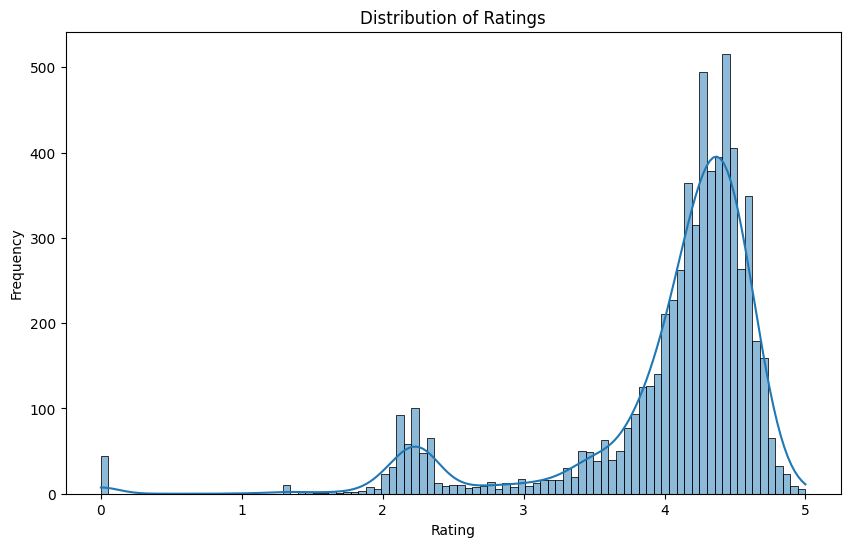

In [94]:
# Histograms/Distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating_PS'].astype(float), kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# **Category Bar Plots**

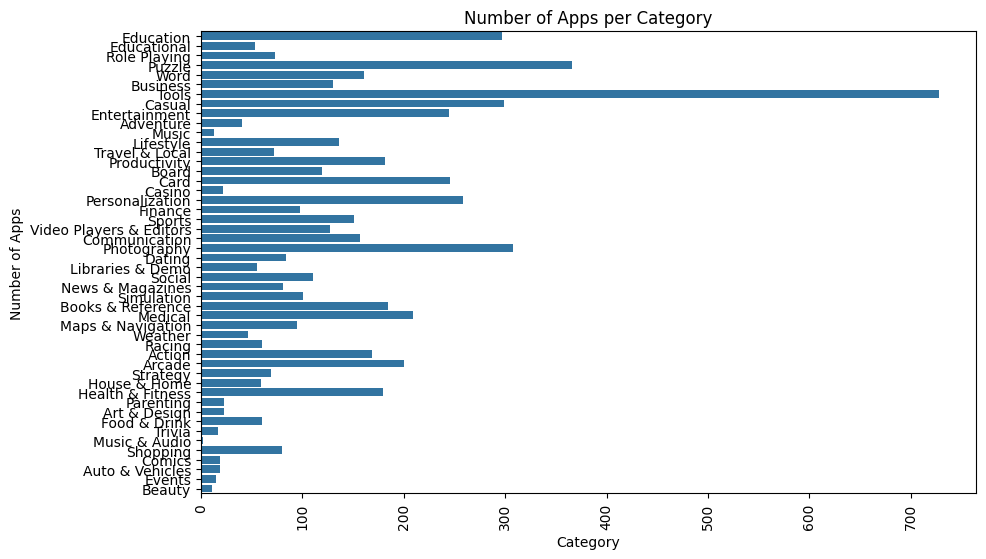

In [57]:
# Bar Plots
plt.figure(figsize=(10, 6))
sns.countplot(df['Category_PS'])
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

# **Rating vs Installs Scatter Plot**

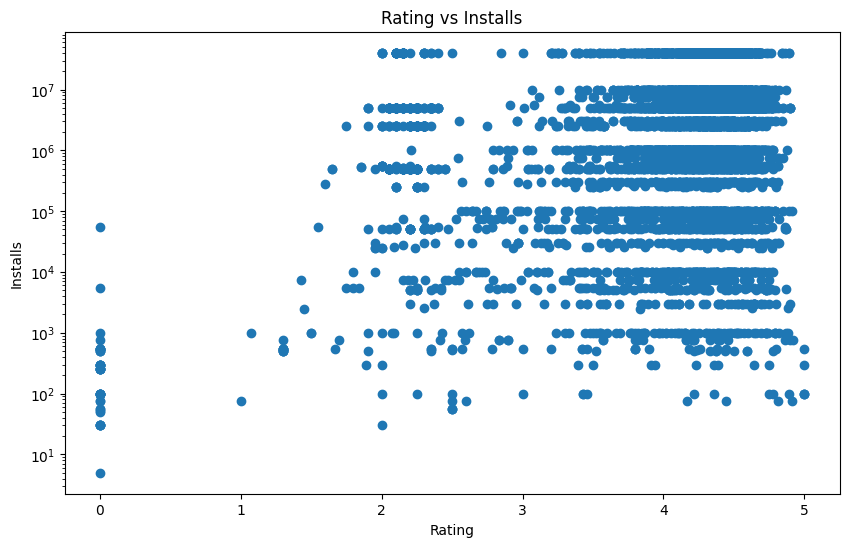

In [95]:

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating_PS'].astype(float), df['Installs_PS'].astype(int))
plt.title('Rating vs Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.xscale('linear')
plt.yscale('log')
plt.show()

# **Proportion of Applications by Version Pie Chart**

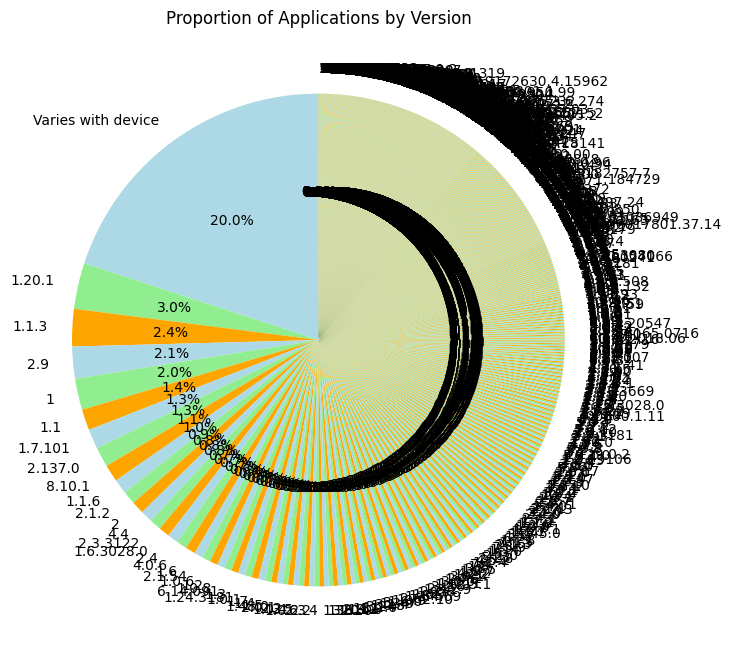

In [59]:
# Pie Chart
plt.figure(figsize=(8, 8))
df['Version'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange'])
plt.title('Proportion of Applications by Version')
plt.ylabel('')
plt.show()

# **Distribution of Price**

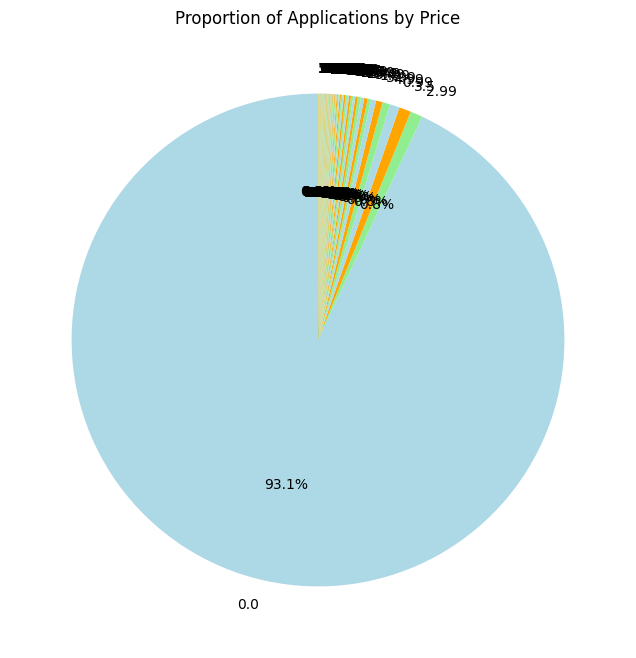

In [102]:
# Pie Chart
plt.figure(figsize=(8, 8))
df['Price_GP'].astype(float).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange'])
plt.title('Proportion of Applications by Price')
plt.ylabel('')
plt.show()

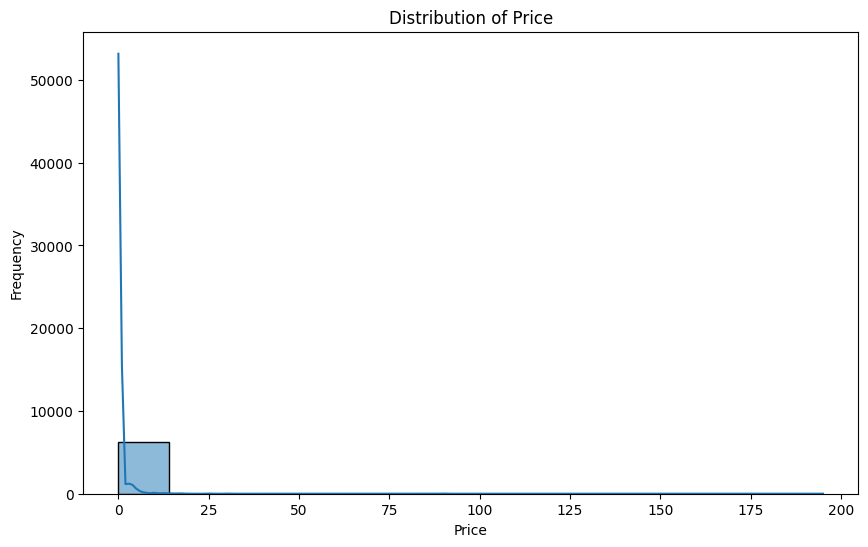

In [105]:

# Histograms/Distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_GP'].astype(float), kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

# **Size Bar Plots**

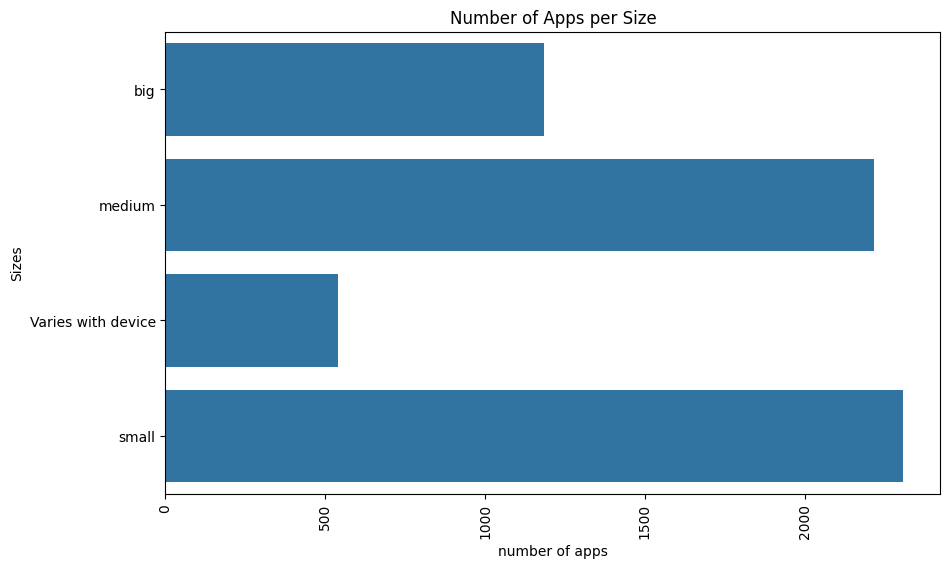

In [71]:
# Bar Plots
plt.figure(figsize=(10, 6))
sns.countplot(df['Size_PS'])
plt.title('Number of Apps per Size')
plt.xlabel('number of apps')
plt.ylabel('Sizes')
plt.xticks(rotation=90)
plt.show()

# **Size vs Rating Scatter Plot**

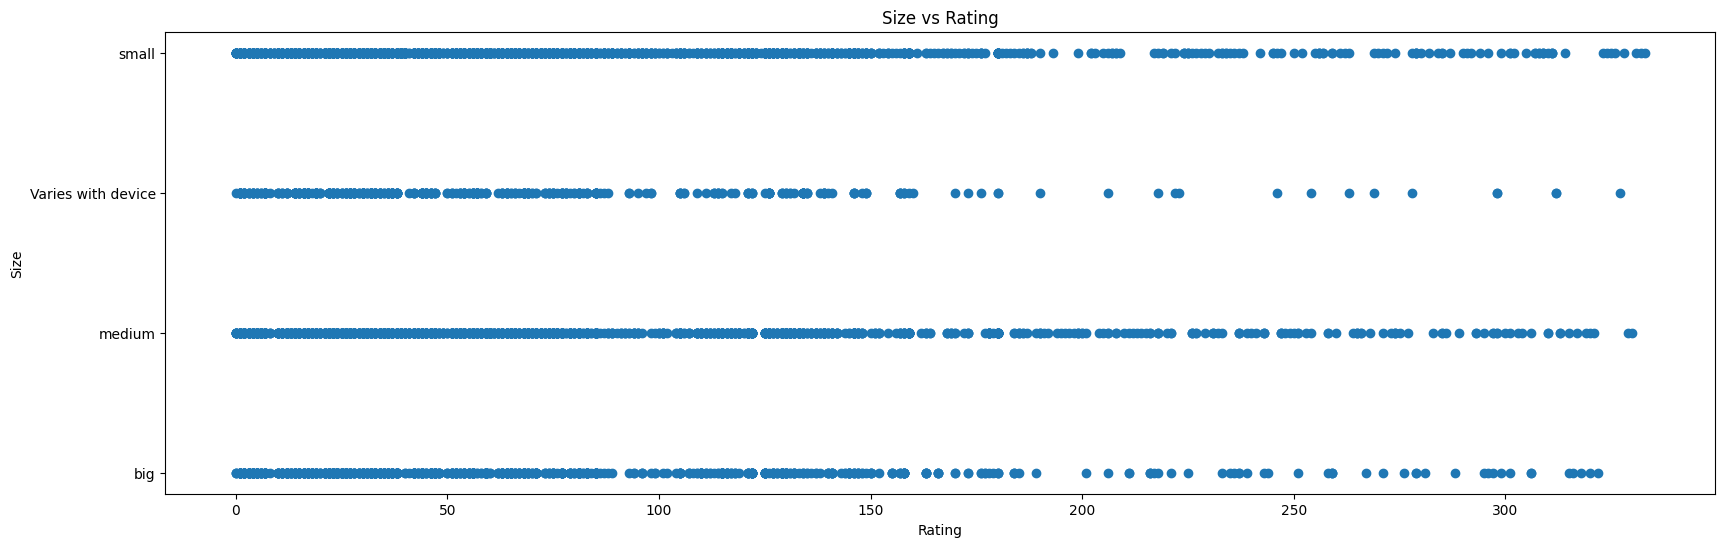

In [85]:

# Scatter Plot
plt.figure(figsize=(20, 6))
plt.scatter( df['Rating_PS'].astype(str),df['Size_PS'])
plt.title('Size vs Rating')
plt.xlabel('Rating')
plt.ylabel('Size')

plt.xscale('linear')
plt.show()

# **Compare Rating In Sport Apps**

In [86]:
import pandas as pd
higher = 0
equal = 0
lower = 0

# Filter the dataset to select only the rows where the category is 'sport'
sport_apps = df[df['Category_PS'] == 'Sports']

# Calculate the average rating for the 'sport' category
sum = 0
count = 0
for index, row in df.iterrows():
  if df.loc[index, 'Category_PS'] == 'Sports':
    sum += float(df.loc[index, 'Rating_PS'])
    count +=1
mean = sum / count
print(mean)
# Compare the Rating of each app with the average rating
for index, row in sport_apps.iterrows():
    if float(row['Rating_PS']) > mean:
        higher += 1
        print(f"{row['App Name']} has a rating higher than the average rating for 'sport' category.")
    elif float(row['Rating_PS']) < mean:
        lower +=1
        print(f"{row['App Name']} has a rating lower than the average rating for 'sport' category.")
    else:
        equal +=1
        print(f"{row['App Name']} has the same rating as the average rating for 'sport' category.")
print(higher)
print(lower)
print(equal)

4.168741721854302
MSN Sports - Scores & Schedule has a rating higher than the average rating for 'sport' category.
8 Ball Pool has a rating higher than the average rating for 'sport' category.
8 Ball Pool has a rating higher than the average rating for 'sport' category.
8 Ball Pool has a rating higher than the average rating for 'sport' category.
8 Ball Pool has a rating higher than the average rating for 'sport' category.
8 Ball Pool has a rating higher than the average rating for 'sport' category.
8 Ball Pool has a rating higher than the average rating for 'sport' category.
8 Ball Pool has a rating higher than the average rating for 'sport' category.
Basketball Stars has a rating higher than the average rating for 'sport' category.
Football Live Scores has a rating higher than the average rating for 'sport' category.
Football Live Scores has a rating higher than the average rating for 'sport' category.
Football Live Scores has a rating higher than the average rating for 'sport' categ

4.168741721854302


<ipython-input-87-0bf931b35fa4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sport_apps['Rating_above_avg'] = np.where(sport_apps['Rating_PS'].astype(float) > mean, 'Above Average', 'Below Average')


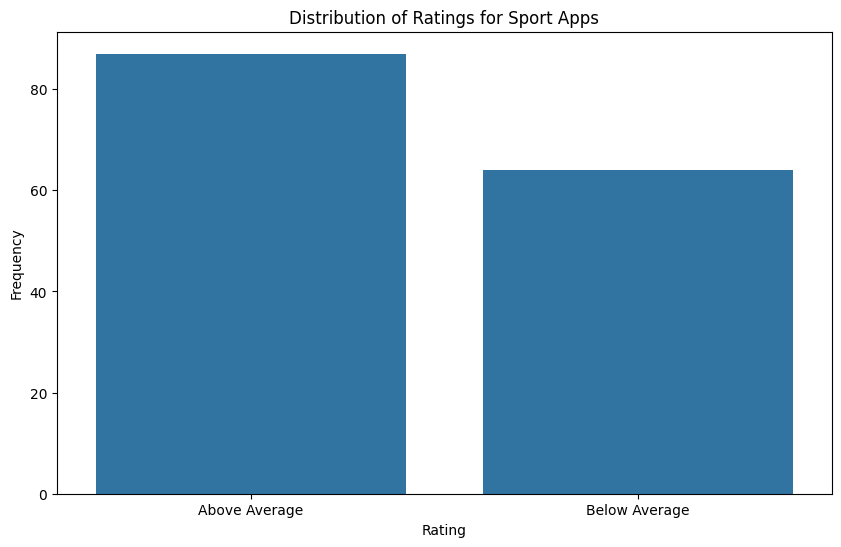

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sum = 0
count = 0
for index, row in df.iterrows():
  if df.loc[index, 'Category_PS'] == 'Sports':
    sum += float(df.loc[index, 'Rating_PS'])
    count +=1
mean = sum / count
# Filter the DataFrame to only include rows where the category is 'sport'
sport_apps = df[df['Category_PS'] == 'Sports']

# Calculate the average rating for the sport apps

print(mean)
# Create a new column in the DataFrame that indicates whether the rating is above or below the average
sport_apps['Rating_above_avg'] = np.where(sport_apps['Rating_PS'].astype(float) > mean, 'Above Average', 'Below Average')

# Create a bar plot to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating_above_avg', data=sport_apps)
plt.title('Distribution of Ratings for Sport Apps')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()